In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from data_gen import get_agent_distribution_nels, generate_losses, get_types_and_noise
from utils import compute_continuity_noise
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
np.random.seed(0)
d=9
prev_beta = np.ones(d)/np.sqrt(d)
prev_s= 19.5

In [3]:
agent_dist, all_types, all_labels, sigma = get_agent_distribution_nels(n=1000000, prev_beta=prev_beta, n_clusters=5, seed=0)

19.54284465637207
(14915, 1, 1)


In [4]:
print(sigma)

1.1009334628038718


In [5]:
sample_idx = np.random.choice(list(range(len(all_types))), 1000)
sample_types = all_types[sample_idx]
sample_labels = all_labels[sample_idx]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(sample_types)

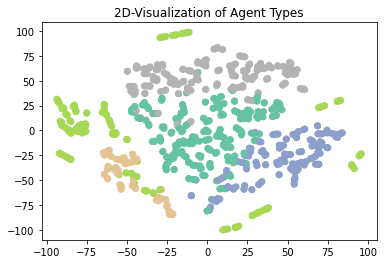

In [6]:
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=sample_labels, cmap="Set2")
plt.title("2D-Visualization of Agent Types")
plt.savefig("figs/agent_type_clusters.pdf")

In [7]:
def loss_beta(agent_dist, indices, beta, sigma, q):
    s_beta = agent_dist.quantile_fixed_point_true_distribution(beta, sigma, q)
    br_noisy_scores = agent_dist.best_response_noisy_score_distribution(beta, s_beta, sigma)
    rejected = br_noisy_scores < np.quantile(br_noisy_scores, q)
    type_losses, stu_id = generate_losses()
    losses = type_losses[agent_dist.n_agent_types]
    losses[rejected] = 0.
    return np.sum(losses)/len(losses)

In [8]:
all_losses = []

for i in tqdm(range(100)):
    addend = np.zeros(prev_beta.shape)
    addend[0] += i * 0.05
    beta = prev_beta + addend
    beta /= np.sqrt(np.sum(beta ** 2))
    all_losses.append(loss_beta(agent_dist, indices, beta=beta, sigma=0.4, q=0.7))

  0%|                                                   | 0/100 [00:00<?, ?it/s]


NameError: name 'indices' is not defined

In [ ]:
plt.plot(list(range(100)), all_losses)